In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker


from highlight_text import fig_text
from PIL import Image
import urllib

In [2]:
from plotly import __version__

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode
cf.go_offline()

In [3]:
sns.set_style('darkgrid')

In [4]:
path = 'C:\\Users\\Gusse\\OneDrive\\Dokumenter\\Python\\Football\\Tutorials\\Sonofacorner_Tutorials\\'

In [5]:
df = pd.read_csv(f'{path}Everton_2223.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          37 non-null     object 
 1   Time          37 non-null     object 
 2   Round         37 non-null     object 
 3   Day           37 non-null     object 
 4   Venue         37 non-null     object 
 5   Result        37 non-null     object 
 6   GF            37 non-null     int64  
 7   GA            37 non-null     int64  
 8   Opponent      37 non-null     object 
 9   xG            37 non-null     float64
 10  xGA           37 non-null     float64
 11  Poss          37 non-null     int64  
 12  Attendance    37 non-null     int64  
 13  Captain       37 non-null     object 
 14  Formation     37 non-null     object 
 15  Referee       37 non-null     object 
 16  Match Report  37 non-null     object 
 17  Notes         0 non-null      float64
dtypes: float64(3), int64(4), object(

In [7]:
df.describe()

,GF,GA,xG,xGA,Poss,Attendance,Notes
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,0.0
mean,0.891892,1.540541,1.197297,1.762162,42.891892,39805.297297,NaN
std,1.021540,1.168917,0.629588,0.762799,9.760418,12178.476038,NaN
min,0.000000,0.000000,0.100000,0.500000,22.000000,10382.000000,NaN
25%,0.000000,1.000000,0.800000,1.000000,38.000000,36338.000000,NaN
50%,1.000000,2.000000,1.200000,1.800000,43.000000,39254.000000,NaN
75%,1.000000,2.000000,1.600000,2.300000,49.000000,39376.000000,NaN
max,5.000000,4.000000,3.100000,3.400000,67.000000,73509.000000,NaN


In [8]:
Y_for = df["xG"].rolling(window= 3, min_periods = 0).mean()
Y_ag = df["xGA"].rolling(window= 3, min_periods = 0).mean()
X = pd.Series(range(len(Y_for)))

(-0.5, 191.5, 191.5, -0.5)

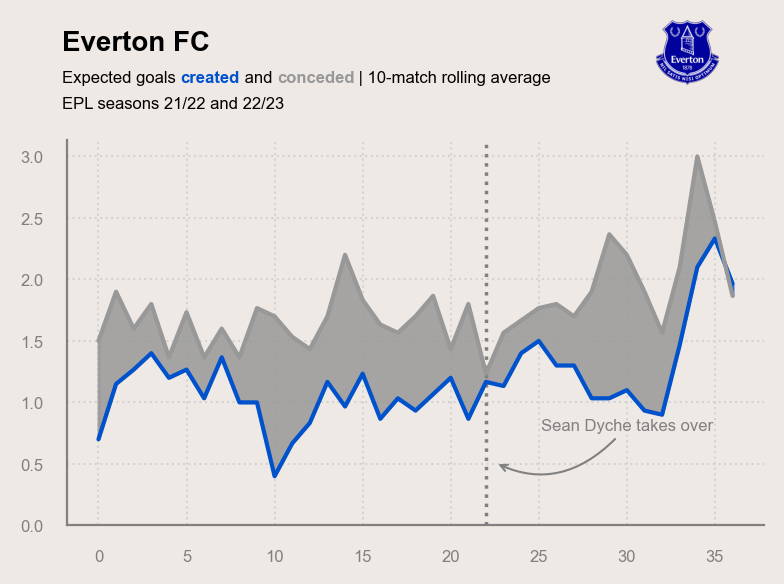

In [9]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# axes
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey",
    zorder = 2
)

# lines
line_1 = ax.plot(X, Y_for, color = "#0052CC", zorder = 4)
line_2 = ax.plot(X, Y_ag, color = "#989898", zorder = 4)

ax.set_ylim(0)

ax.plot(
    [22,22],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# line for manager change
ax.annotate(
    xy = (22, .55),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "Sean Dyche takes over",
    size = 6,
    color = "grey",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    )
)

# fill between lines
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for >= Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag > Y_for, 
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# ticker styling
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)


# Changes to the matplotlib ticker
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))


# Tittle
fig_text(
    x = 0.12, y = 1.1,
    s = "Everton FC",
    color = "black",
    weight = "bold",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)
# subtitle
fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 10-match rolling average\nEPL seasons 21/22 and 22/23",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)


# Everton logo
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8668.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

# plt.savefig('viz/Rolling xG Chart for Everton.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Results by Venue')

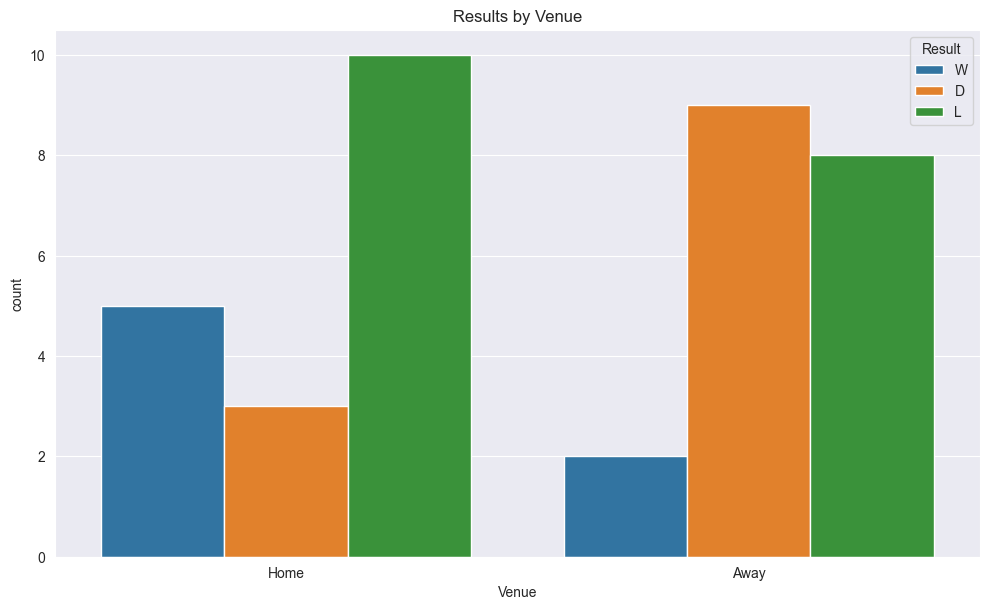

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Venue', hue='Result', hue_order=['W','D','L'])
plt.tight_layout()
plt.title('Results by Venue')

Text(0.5, 1.0, 'Wins by Formation')

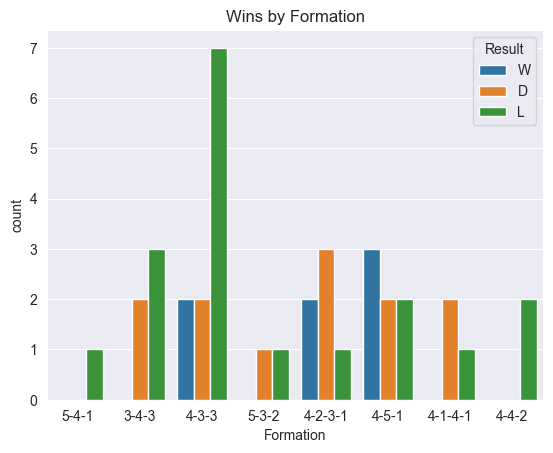

In [11]:
sns.countplot(data=df, x='Formation', hue='Result', hue_order=['W','D','L'])
plt.title('Wins by Formation')

Text(0.5, 69.7222222222222, 'Referee')

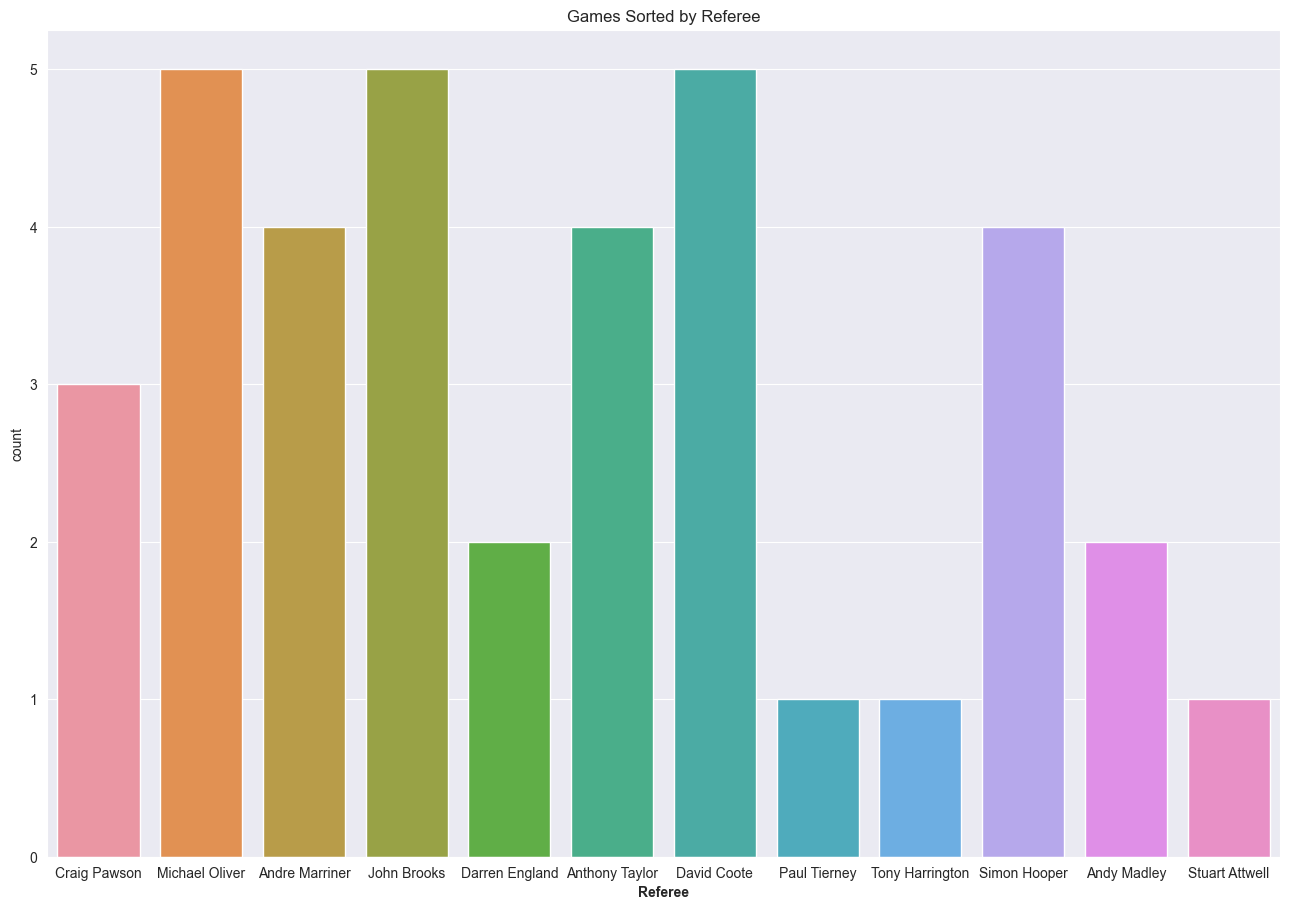

In [12]:
plt.figure(figsize=(13,9))
sns.countplot(data=df, x='Referee')
plt.tight_layout()
plt.title('Games Sorted by Referee')
plt.xlabel('Referee', fontweight='bold')

Text(0.5, 69.7222222222222, 'Referee')

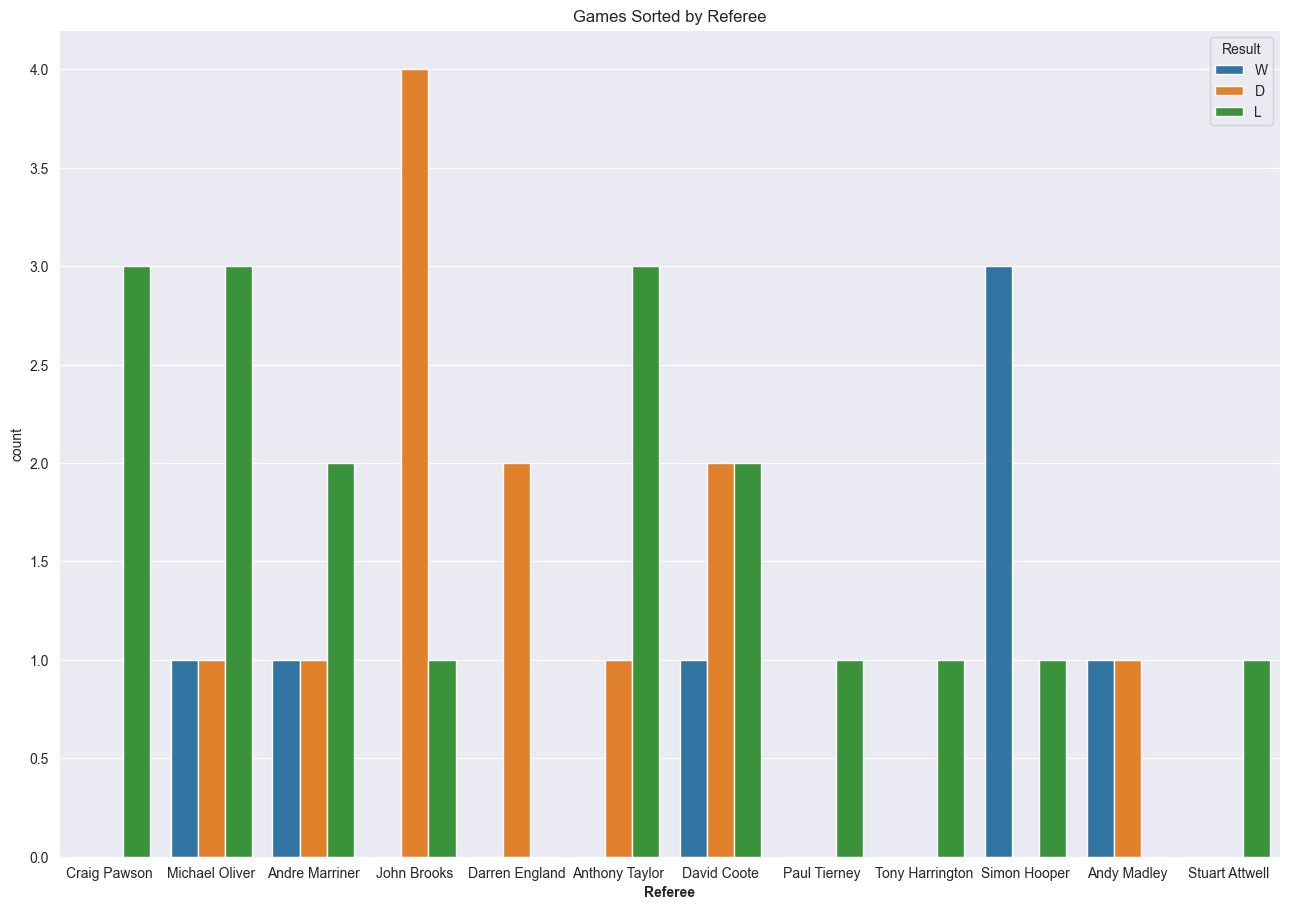

In [13]:
plt.figure(figsize=(13,9))
sns.countplot(data=df, x='Referee', hue='Result', hue_order=['W','D','L'])
plt.tight_layout()
plt.title('Games Sorted by Referee')
plt.xlabel('Referee', fontweight='bold')

Text(0.5, 1.0, 'Home and Away xG')

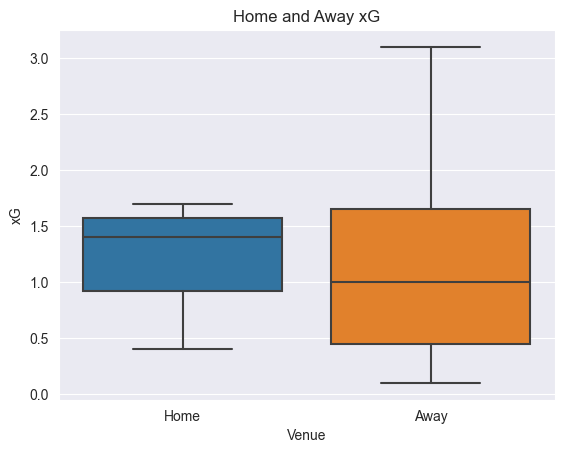

In [14]:
sns.boxplot(data=df, x='Venue', y='xG')
plt.title('Home and Away xG')

Text(0.5, 1.0, 'Home and Away xGA')

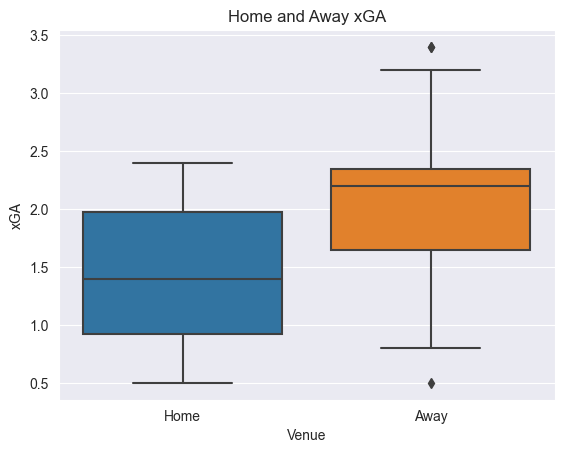

In [176]:
sns.boxplot(data=df, x='Venue', y='xGA')
plt.title('Home and Away xGA')

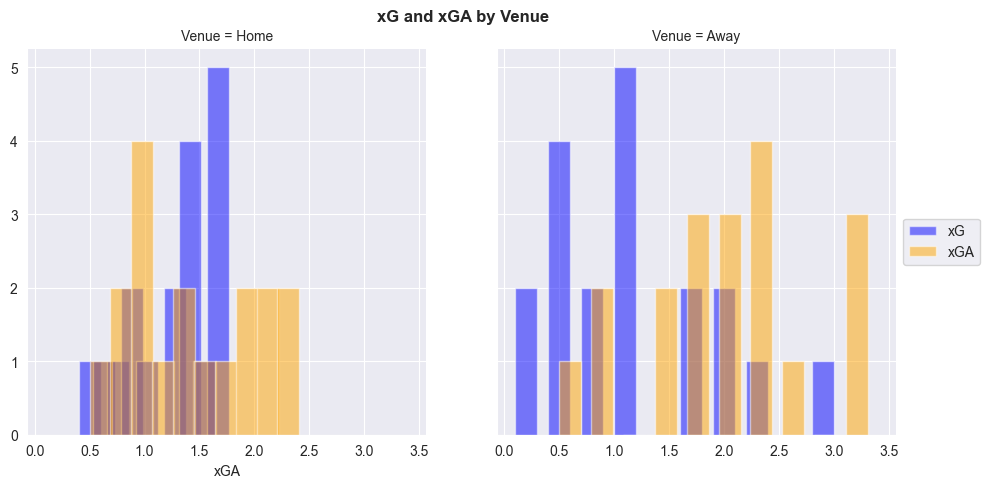

In [153]:
g = sns.FacetGrid(df, col="Venue", height=5)
g = g.map(plt.hist, "xG", color='blue', alpha=0.5, label='xG', width=0.2)
g = g.map(plt.hist, "xGA", color='orange', alpha=0.5, label='xGA', width=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('xG and xGA by Venue', loc='left',x=-0.3, y=1.05, fontweight='bold')
plt.xlabel(' ')
plt.tight_layout()

In [15]:
path2 = 'C:\\Users\\Gusse\\OneDrive\\Dokumenter\\Python\\Football\\'

In [16]:
player_stats = pd.read_csv(f'{path2}Final FBRef 2022-2023.csv')

In [17]:
player_stats.loc[player_stats['Player'].str.split().str.len() == 2, 'last name'] = player_stats['Player'].str.split().str[-1]

In [18]:
player_stats["Player_nick"] = player_stats['Player'].astype(str).str[0] +". "+ player_stats["last name"]

In [19]:
player_stats["Pos"] = player_stats['Pos'].astype(str).str[0:2]

In [20]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Columns: 281 entries, Player to Player_nick
dtypes: float64(267), int64(6), object(8)
memory usage: 6.5+ MB


In [13]:
player_stats.describe()

,Age,Born,MP,Starts,Min,G+A,Glsxx,Goals,Shots,SoT,...,pAdjDrbPastPer90,pAdjAerialWinsPer90,pAdjAerialLossPer90,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses
count,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,...,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3033.000000,3033.000000,3012.000000
mean,26.170220,1996.350607,19.546409,14.019351,1258.568383,2.867826,0.115963,1.693014,15.741555,5.243686,...,0.875982,17.973096,17.801590,1.615721,9.368528,2.596573,55.871885,29.410304,1.587570,5.017520
std,4.638177,4.641413,11.750379,11.484468,982.626845,4.449621,0.273379,3.137000,19.514114,7.646555,...,1.816569,22.535763,19.108498,2.083759,4.400041,3.941334,26.555071,6.285962,1.644527,3.674464
min,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1993.000000,9.000000,3.000000,328.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.286329,2.617801,2.830189,0.694643,7.176116,1.134563,42.618146,25.595238,0.352734,3.254214
50%,26.000000,1997.000000,20.000000,12.000000,1123.000000,1.000000,0.000000,0.000000,9.000000,2.000000,...,0.677176,9.493671,12.704174,1.428148,9.290875,2.392503,55.359182,29.289026,1.184346,4.956630
75%,30.000000,2000.000000,30.000000,23.000000,2040.000000,4.000000,0.160000,2.000000,22.000000,7.000000,...,1.126972,25.139665,26.490066,2.136106,10.802244,3.358593,64.610301,32.980600,2.343750,6.580552
max,42.000000,2007.000000,38.000000,38.000000,3420.000000,44.000000,9.000000,36.000000,144.000000,73.000000,...,77.186964,198.515770,168.133803,77.186964,94.055711,96.179986,604.606526,100.000000,25.000000,50.000000


In [14]:
player_stats.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min',
       ...
       'pAdjDrbPastAttPer90', 'TouchCentrality', 'Tkl+IntPer600OppTouch',
       'pAdjTouchesPer90', 'CarriesPer50Touches', 'ProgCarriesPer50Touches',
       'ProgPassesPer50CmpPasses', 'Main Position', 'last name',
       'Player_nick'],
      dtype='object', length=281)

In [33]:
everton_player = player_stats[player_stats['Squad']=='Everton']
everton_player = everton_player[everton_player['Min']>500]
everton_player = everton_player.sort_values('last name')

In [175]:
everton_player.iplot(kind='scatter', x='SCA', y='GCA', mode='markers', title='Creative Actions', colorscale='set1',
                     xTitle='Shot Creating Actions', yTitle='Goal Creating Actions', categories='Pos', text='Player',)

C:\Users\Gusse\AppData\Local\Programs\Python\Python310\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

C:\Users\Gusse\AppData\Local\Programs\Python\Python310\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [176]:
midfielder = everton_player[(everton_player['Main Position'].str.contains('Defensive Midfield')) | 
                (everton_player['Main Position'].str.contains('Attacking Midfield')) |
                (everton_player['Main Position'].str.contains('Central Midfield')) | 
                            (everton_player['Main Position'].str.contains('Right Midfield')) | 
                (everton_player['Main Position'].str.contains('Left Midfield')) |
                (everton_player['Main Position'].str.contains('Left Winger')) |
                (everton_player['Main Position'].str.contains('Right Winger'))]
midfielder = midfielder[midfielder['Min']> 100]

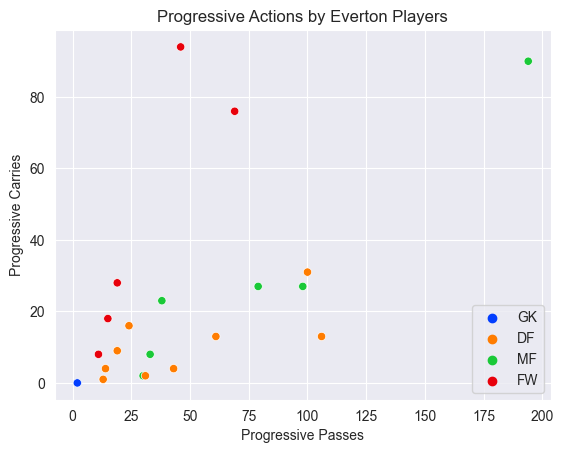

In [177]:
sns.scatterplot(data=everton_player, x='ProgPasses', y='ProgCarries', 
                hue='Pos', palette='bright', hue_order=['GK','DF','MF','FW'])
plt.title('Progressive Actions by Everton Players')
plt.xlabel('Progressive Passes')
plt.ylabel('Progressive Carries')
plt.legend(loc='lower right')

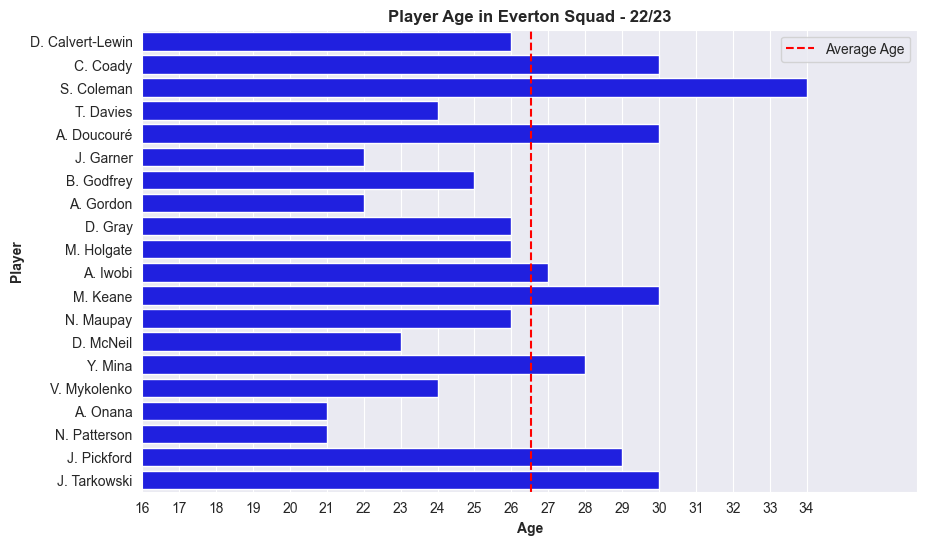

In [178]:
plt.figure(figsize=(10,6))
sns.barplot(data=everton_player, x='Age', y='Player_nick', color='blue')


# limiting length of x-axis
plt.xlim(16,37)


# labels
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Player', fontweight='bold')

# tile
plt.title('Player Age in Everton Squad - 22/23', fontweight='bold')

# average age line
plt.axvline(x=np.nanmean(everton_player.Age), color='red', ls='--', label='Average Age')

# ticks
plt.xticks(np.arange(16, 35, 1))

# legend
plt.legend()

# plt.savefig('viz/Age profile of Everton 22-23',dpi=200)

Text(0.5, 1.0, 'Everton Player Age & Minutes Played')

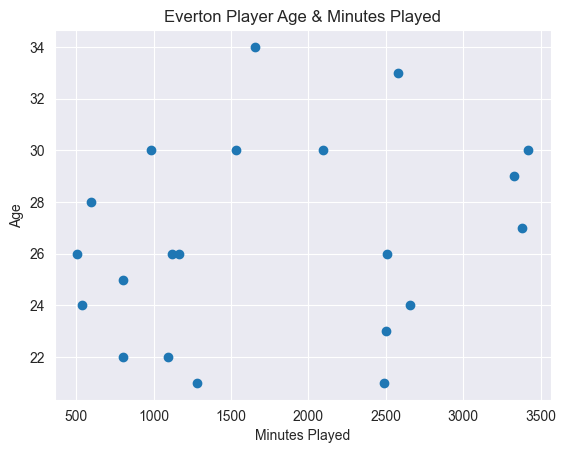

In [182]:
plt.scatter(y=everton_player['Age'], x=everton_player['Min'])
plt.xlabel('Minutes Played')
plt.ylabel('Age')
plt.title('Everton Player Age & Minutes Played')

In [64]:
matches = pd.read_csv(f'{path2}Final FBRef 2022-2023 TEAMS.csv')

In [41]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Squad          98 non-null     object 
 1   Comp           98 non-null     object 
 2   # Pl           98 non-null     int64  
 3   Age            98 non-null     float64
 4   Poss           98 non-null     float64
 5   MP             98 non-null     int64  
 6   Starts         98 non-null     int64  
 7   Team Min       98 non-null     int64  
 8   90s            98 non-null     float64
 9   Gls            98 non-null     int64  
 10  Ast            98 non-null     int64  
 11  G+A            98 non-null     int64  
 12  G-PK           98 non-null     int64  
 13  PK             98 non-null     int64  
 14  PKatt          98 non-null     int64  
 15  CrdY           98 non-null     int64  
 16  CrdR           98 non-null     int64  
 17  xG             98 non-null     float64
 18  npxG        

In [42]:
matches.describe()

,# Pl,Age,Poss,MP,Starts,Team Min,90s,Gls,Ast,G+A,...,PrgP,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,TeamTouches90,Opp Touches
count,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,29.479592,26.847959,50.00000,37.265306,409.918367,3353.877551,37.265306,49.826531,34.714286,84.540816,...,1402.418367,1.341224,0.934898,2.275918,1.219490,2.154592,1.367755,0.977857,596.739259,22236.377551
std,3.265659,1.181405,6.14386,1.556834,17.125175,140.115068,1.556834,14.992112,12.102654,26.804050,...,315.792243,0.412759,0.331822,0.736877,0.400542,0.726797,0.317326,0.255029,76.099321,2178.779501
min,24.000000,24.200000,37.60000,34.000000,374.000000,3060.000000,34.000000,22.000000,12.000000,34.000000,...,847.000000,0.580000,0.320000,0.890000,0.420000,0.740000,0.900000,0.590000,471.368421,16907.000000
25%,27.000000,26.025000,45.82500,38.000000,418.000000,3420.000000,38.000000,38.500000,26.250000,65.250000,...,1168.250000,1.057500,0.710000,1.745000,0.927500,1.615000,1.122500,0.760000,540.954334,20607.250000
50%,29.000000,26.850000,49.30000,38.000000,418.000000,3420.000000,38.000000,47.500000,33.000000,81.500000,...,1347.000000,1.290000,0.870000,2.180000,1.180000,2.065000,1.325000,0.920000,586.276316,22221.000000
75%,31.750000,27.400000,53.70000,38.000000,418.000000,3420.000000,38.000000,58.500000,41.000000,99.000000,...,1612.250000,1.617500,1.110000,2.740000,1.470000,2.545000,1.530000,1.137500,644.941176,23998.000000
max,40.000000,29.700000,64.70000,38.000000,418.000000,3420.000000,38.000000,92.000000,69.000000,161.000000,...,2180.000000,2.650000,1.970000,4.620000,2.560000,4.530000,2.200000,1.670000,794.789474,27043.000000


In [80]:
matches.drop('90s',axis=1, inplace=True)
matches.drop('# Pl',axis=1, inplace=True)
matches.drop('Starts',axis=1,inplace=True)
matches.drop('Team Min', axis=1, inplace=True)

In [166]:
matches.drop('MP',axis=1, inplace=True)

In [65]:
matches['Comp'] = matches['Comp'].apply(lambda league: league[3:])

In [95]:
matches = matches.replace(' Premier League', value='Premier League')

In [167]:
prem = matches[matches['Comp']=='Premier League']
prem.head()

,Squad,Comp,Age,Poss,Gls,Ast,G+A,G-PK,PK,PKatt,...,PrgP,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,TeamTouches90,Opp Touches
3,Arsenal,Premier League,24.7,59.3,84,64,148,81,3,4,...,2049,2.21,1.68,3.89,2.13,3.82,1.89,1.41,681.815789,19203
4,Aston Villa,Premier League,27.0,49.3,49,35,84,46,3,4,...,1242,1.29,0.92,2.21,1.21,2.13,1.32,1.02,565.815789,22020
15,Bournemouth,Premier League,26.3,40.4,37,24,61,37,0,0,...,1006,0.97,0.63,1.61,0.97,1.61,1.02,0.75,525.000000,26820
16,Brentford,Premier League,26.2,43.8,56,36,92,49,7,8,...,1131,1.47,0.95,2.42,1.29,2.24,1.49,1.02,519.736842,24216
18,Brighton,Premier League,26.3,60.2,68,46,114,62,6,6,...,1849,1.79,1.21,3.00,1.63,2.84,1.93,1.37,703.342105,19339


In [119]:
prem.columns

Index(['Squad', 'Comp', 'Age', 'Poss', 'MP', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'TeamTouches90', 'Opp Touches'],
      dtype='object')

In [105]:
team_efc = prem[prem['Squad']=='Everton']

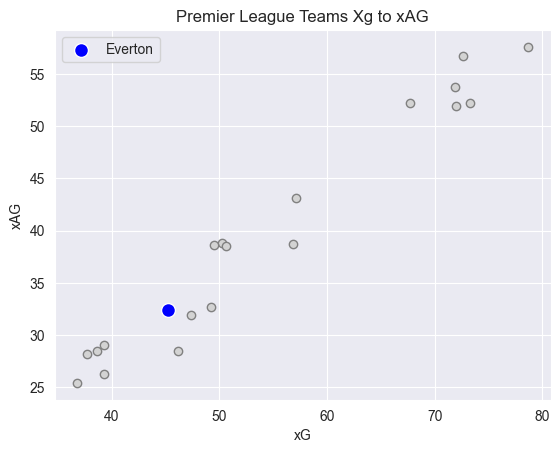

In [137]:
plt.scatter(x=prem['xG'], y=prem['xAG'], c='lightgrey', edgecolor='grey', zorder=1)
plt.scatter(x=team_efc['xG'], y=team_efc['xAG'],s=100, c='blue', edgecolor='white', zorder=2, label='Everton')
plt.xlabel('xG')
plt.ylabel('xAG')
plt.title('Premier League Teams Xg to xAG')
plt.legend()

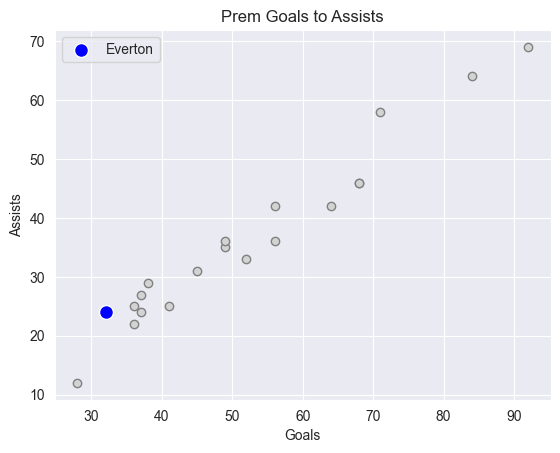

In [138]:
plt.scatter(x=prem['Gls'], y=prem['Ast'],c='lightgrey',edgecolor='grey')
plt.scatter(x=team_efc['Gls'], y=team_efc['Ast'], c='blue', edgecolor='white', s=100, label='Everton')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.title('Prem Goals to Assists')
plt.legend()

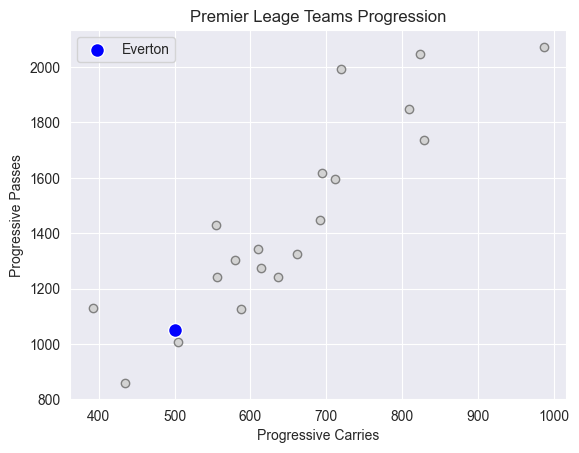

In [145]:
plt.scatter(x=prem['PrgC'], y=prem['PrgP'],c='lightgrey',edgecolor='grey')
plt.scatter(x=team_efc['PrgC'], y=team_efc['PrgP'], c='blue', edgecolor='white', s=100, label='Everton')
plt.xlabel('Progressive Carries')
plt.ylabel('Progressive Passes')
plt.title('Premier Leage Teams Progression')
plt.legend()

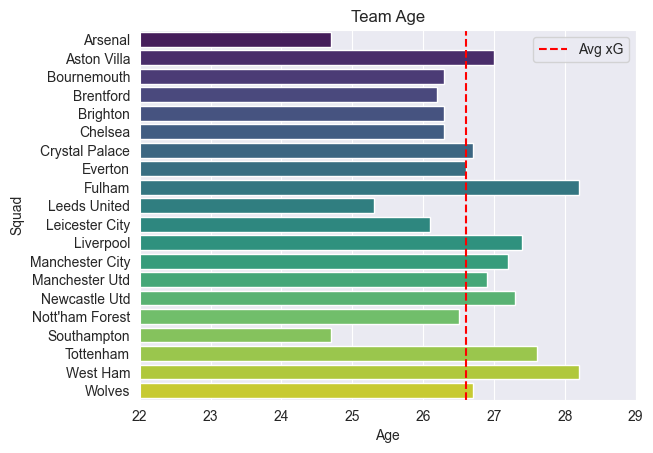

In [172]:
sns.barplot(data=prem, y='Squad',x='Age', orient='h',order=prem.sort_values('Squad').Squad, palette='viridis')
plt.axvline(x=np.nanmean(prem.Age), color='red', ls='--', label='Avg xG')
plt.title('Team Age')
plt.xlim(22,29)
plt.legend()

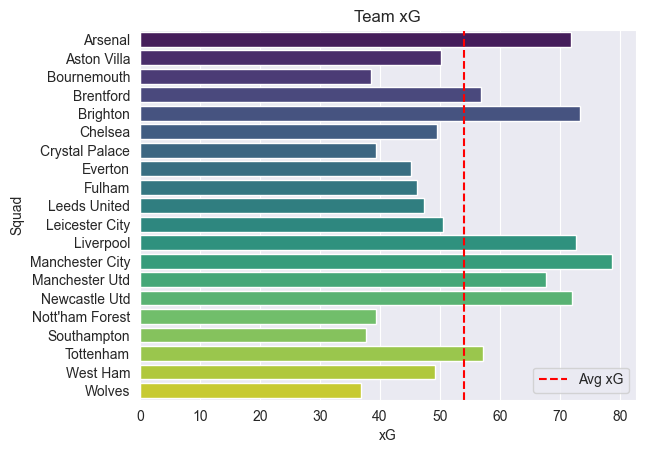

In [163]:
sns.barplot(data=prem, y='Squad',x='xG', orient='h',order=prem.sort_values('Squad').Squad, palette='viridis')
plt.axvline(x=np.nanmean(prem.xG), color='red', ls='--', label='Avg xG')
plt.title('Team xG')
plt.legend()

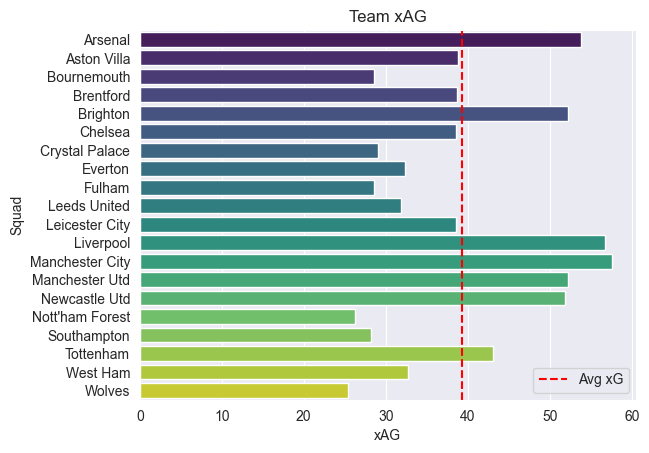

In [164]:
sns.barplot(data=prem, y='Squad',x='xAG', orient='h',order=prem.sort_values('Squad').Squad, palette='viridis')
plt.axvline(x=np.nanmean(prem.xAG), color='red', ls='--', label='Avg xG')
plt.title('Team xAG')
plt.legend()

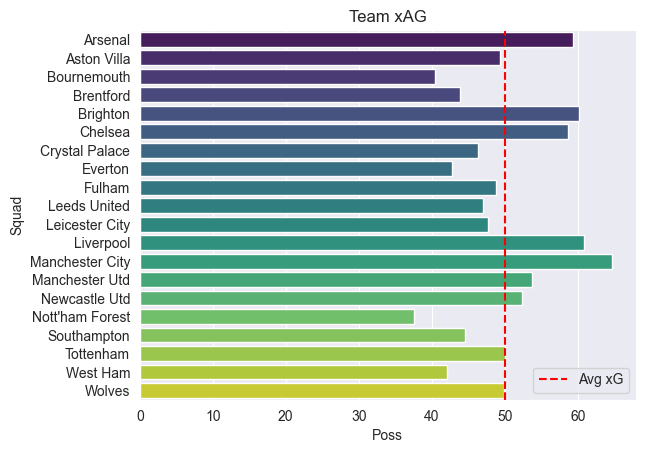

In [173]:
sns.barplot(data=prem, y='Squad',x='Poss', orient='h',order=prem.sort_values('Squad').Squad, palette='viridis')
plt.axvline(x=np.nanmean(prem.Poss), color='red', ls='--', label='Avg xG')
plt.title('Team xAG')
plt.legend()

In [174]:
prem.columns

Index(['Squad', 'Comp', 'Age', 'Poss', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'TeamTouches90', 'Opp Touches'],
      dtype='object')